In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = sns.load_dataset('mpg')

# Display the first few rows of the dataset
print(df.head())


    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  


In [2]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)


Missing values:
 mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64


In [3]:
# Fill missing values with the median
df['horsepower'].fillna(df['horsepower'].median(), inplace=True)
# Check for duplicates
duplicates = df.duplicated().sum()
print("Duplicates:", duplicates)

# Remove duplicates
df.drop_duplicates(inplace=True)


Duplicates: 0


In [4]:
# Detect and remove outliers
Q1 = df['horsepower'].quantile(0.25)
Q3 = df['horsepower'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers
outliers = df[(df['horsepower'] < (Q1 - 1.5 * IQR)) | (df['horsepower'] > (Q3 + 1.5 * IQR))]

# Remove outliers
df = df[~((df['horsepower'] < (Q1 - 1.5 * IQR)) | (df['horsepower'] > (Q3 + 1.5 * IQR)))]

print("Outliers removed:", len(outliers))


Outliers removed: 11


Precision: 0.8148148148148148
Recall: 0.8461538461538461
Accuracy: 0.8846153846153846


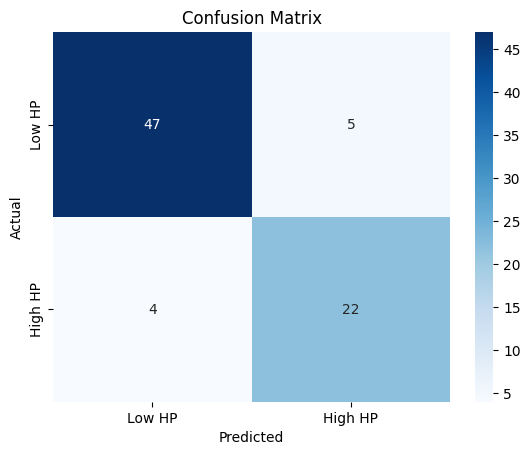

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix
# Create a binary classification target
df['high_hp'] = (df['horsepower'] > 100).astype(int)

# Define features and target
X = df[['mpg', 'displacement', 'weight', 'acceleration']]
y = df['high_hp']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a decision tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Accuracy: {accuracy}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low HP', 'High HP'], yticklabels=['Low HP', 'High HP'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()